## Introduction to the `tweezer` package

The idea of this series of notebooks is that of **live documentation**. This means:

* showing how common tasks are performed
* let the user play with the examples, and thus learning the syntax 

For this to work, a user should clone the `tweezer` repo, create a new branch, say **play**, and start working through the notebooks

Let's get started!!!

In [1]:
import tweezers
help(tweezers)

Help on package tweezers:

NAME
    tweezers - Package for data analysis of optical trap experiments

PACKAGE CONTENTS
    analysis (package)
    container
    debug
    io (package)
    meta
    plot (package)
    simulation (package)

FILE
    /Users/christophehrlich/Documents/Python/tweezers/tweezers/__init__.py




## Loading data

The common data format for tweezer data is `tweezer.TweezerData`. This class requires a data source object that should be inherited from `tweezer.io.BaseSource.BaseSource` (e.g. `tweezer.io.TxtSourceMpi`).
So just create an appropriate data source object for your input (txt files, simulation - whatever) and pass it on to the data object.
You can inspect the data object and look e.g. at its `meta` and `units` property.

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from tweezers.io import TxtMpiSource
from tweezers import TweezersData
from tweezers.plot.psd import PsdPlot, PsdFitPlot
from tweezers.analysis.psd import PsdFitMle

# fix for an IPython bug that overwrites seaborn style, hopefully fixed in the future
import seaborn as sns
sns.set_style('darkgrid')
# make stuff in figures bigger
sns.set_context('talk')

pathData = '../tweezers/data/man_data/35_Date_2014_08_18_15_55_29.txt'
pathPsd = '../tweezers/data/man_data/PSD_35_Date_2014_08_18_15_55_29.txt'
pathTs = '../tweezers/data/man_data/TS_35_Date_2014_08_18_15_55_29.txt'

source = TxtMpiSource(data=pathData, psd=pathPsd, ts=pathTs)
data = TweezersData(source)

## Quick look at the data

In the example below, the data container is taken as it is and the PSDs and their fits are plotted. PSDs and fits in this case come from LabView.

In [3]:
data.meta.print()
data.units.print()

INFO:root:Reading metadata from data source.


{'time': '15:56',
 'date': '18.08.2014',
 'viscosity': 1.148727e-09,
 'psdNSamples': 524288,
 'psdDt': '0.000012',
 'aodY': {'detectorOffset': -0.08664,
          'cornerFrequency': 281.253681,
          'stiffness': 0.040178,
          'displacementSensitivity': 0.000498,
          'beadRadius': 1.05},
 'aodX': {'detectorOffset': -0.058736,
          'cornerFrequency': 503.090072,
          'stiffness': 0.071868,
          'displacementSensitivity': 0.000616,
          'beadDiameter': 2.1,
          'beadRadius': 1.05},
 'pmY': {'detectorOffset': -0.288765,
         'cornerFrequency': 502.663972,
         'stiffness': 0.071807,
         'displacementSensitivity': 0.000573,
         'beadRadius': 1.05},
 'pmX': {'detectorOffset': -0.049036,
         'cornerFrequency': 648.164174,
         'stiffness': 0.092592,
         'displacementSensitivity': 0.000737,
         'beadDiameter': 2.1,
         'beadRadius': 1.05},
 'samplingRate': 1000,
 'psdNBlocks': 64,
 'laserDiodeHours': 30088.3,


INFO:root:Reading PSD from data source.


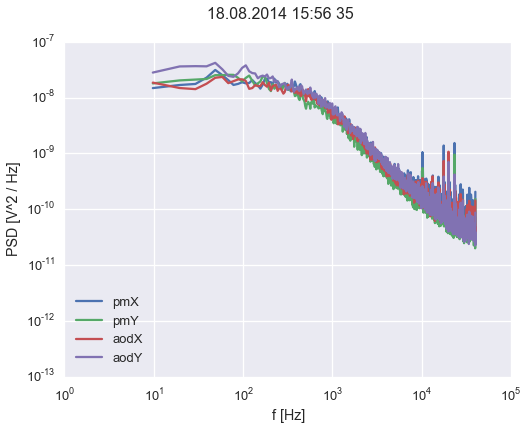

In [4]:
psdPlot = PsdPlot(data)

INFO:root:Reading PSD fit from data source.


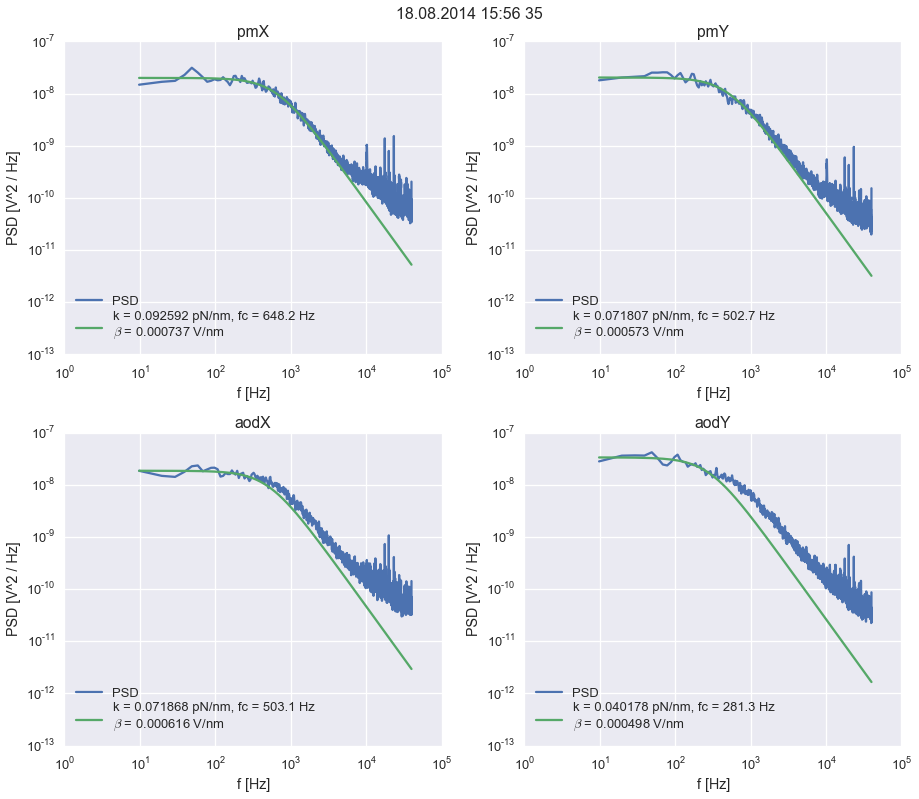

In [5]:
PsdFitPlot(data)

## Analyse the data

Here, the data is analysed which could be necessary if the corresponding quantities are not given in the data source or should just be recomputed.

INFO:root:Meta values: Default metadata value used for key: psdSamplingRate
INFO:root:Reading timeseries from data source.
INFO:root:Meta values: Default metadata value used for key: temperature
INFO:root:Meta values: Default metadata value used for key: temperature
INFO:root:Meta values: Default metadata value used for key: temperature
INFO:root:Meta values: Default metadata value used for key: temperature


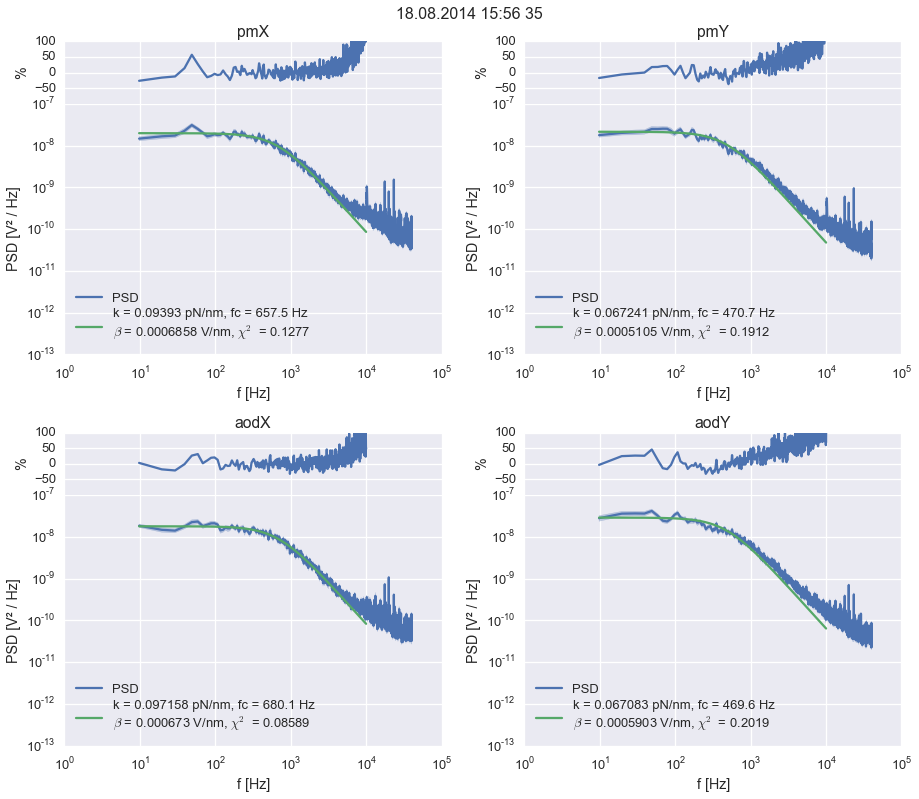

In [6]:
# The 'computePsd' and 'fitPsd' methods return copies of the original object to not overwrite any data read from disk.
dataCopy = data.computePsd(blockLength=2**13).fitPsd(maxF=1E4).thermalCalibration()
PsdFitPlot(dataCopy)

## Advanced analysis

Some examples for advanced analysis features.

INFO:root:Meta values: Default metadata value used for key: temperature
INFO:root:Meta values: Default metadata value used for key: temperature
INFO:root:Meta values: Default metadata value used for key: temperature
INFO:root:Meta values: Default metadata value used for key: temperature


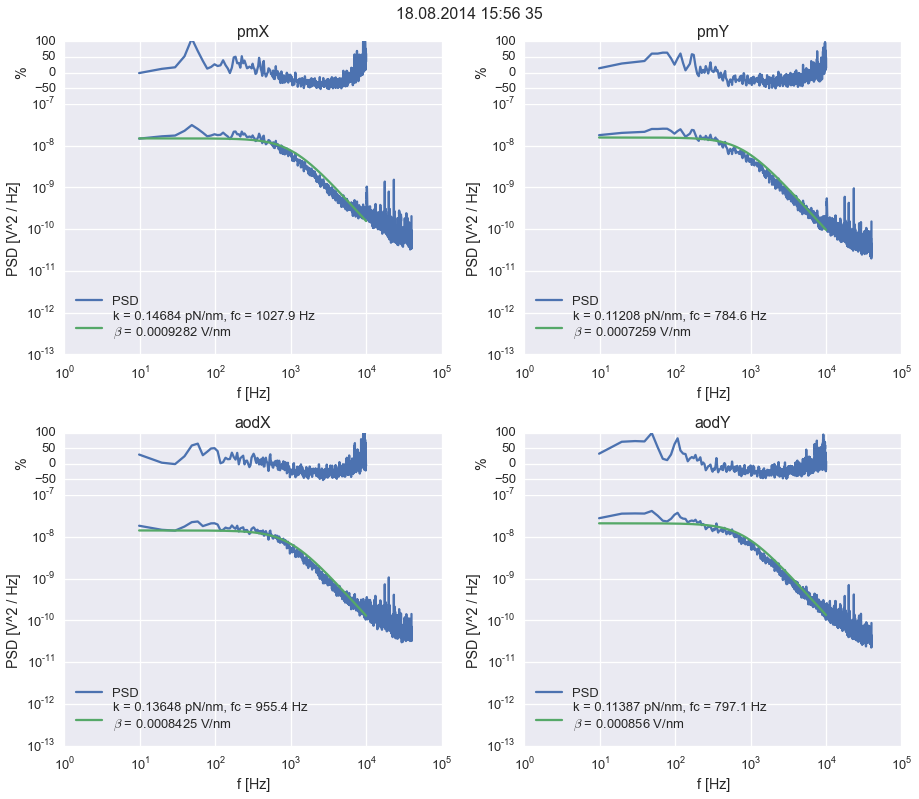

In [7]:
# use MLE fitting for the PSD fitting, note that PsdFitMle must be imported for this to work
dataMle = data.fitPsd(fitCls=PsdFitMle, nBlocks=2**13, maxF=1E4).thermalCalibration()
PsdFitPlot(dataMle)

## Store the data
The `tweezer.TxtSourceMpi` class implements a `write_data` method which allows to write the data (only the experiment data, no PSD or anything) back to disk. This is however not a required feature of a data source and here used for converting the header format to JSON.

In [33]:
pathOutput = '../tweezers/data/JSON'
source.save(data, pathOutput)